In [1]:
import pandas as pd
import numpy as np
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

/var/folders/ht/dg47d7j9403_2cfbpk6nk1xr0000gn/T/ipykernel_37788/1503141303.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
phish = pd.read_csv("phish.csv")

In [3]:
phish

,Unnamed: 0,text,PHISH-GT,billing,account,generic,attachment,typos,click-link,grammar,login,urgency,phish,unsolicited,work
0,42,Please take a look at the attached and give me...,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,44,"Rod,\nI wanted to forward this to you. Arthur...",0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,45,\nI confirmed that since Enron does not deviat...,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,46,Good afternoon.\n\nI wanted to forward you one...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,47,Kim:\n\nHere is a summary of the structure we ...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2892,2936,PayPal You sent a payment of $699.99 USD to FT...,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2893,2937,"monkey.org¬† Hi jose,Pa‚Å†s‚Å†sword for‚Å†¬†jo...",1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
2894,2938,"HELLO, ¬† Please note that, your monthly payme...",1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2895,2939,Verify your¬†MetaMask Wallet Our system has sh...,1,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [4]:
true_phish = phish[phish['PHISH-GT']==1]
#this is our values that are all phishing emails.

In [5]:
fish = phish[phish['PHISH-GT']==0]
#this is our rows that are not phishing emails

Text(0.5, 1.0, 'Comparing Phish Probabilities of Billing-Related Emails')

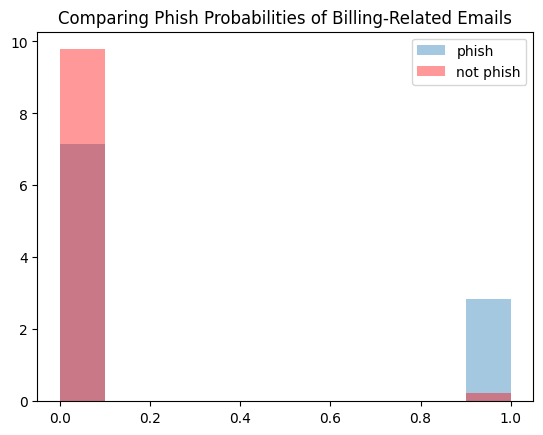

In [6]:
plt.hist(true_phish['billing'], label = 'phish', density = True, alpha = 0.4)
plt.hist(fish['billing'], label = 'not phish', density = True, alpha=0.4, color = 'red')
plt.legend()
plt.title("Comparing Phish Probabilities of Billing-Related Emails")

Text(0.5, 1.0, 'Comparing Phish Probabilities of Account-Related Emails')

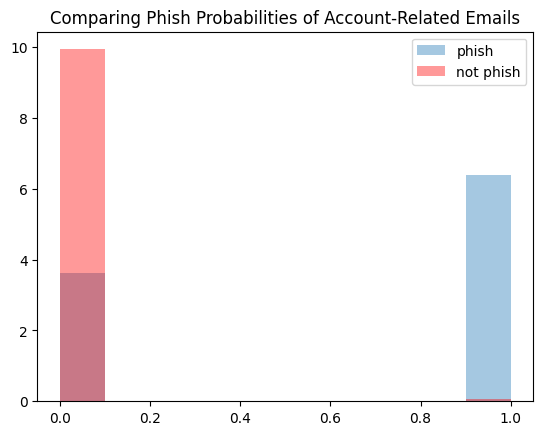

In [7]:
plt.hist(true_phish['account'], histtype='stepfilled', label = 'phish', density = True, stacked = True, alpha = 0.4)
plt.hist(fish['account'], label = 'not phish', density = True, stacked = True, alpha=0.4, color = 'red')
plt.legend()
plt.title("Comparing Phish Probabilities of Account-Related Emails")

Text(0.5, 1.0, 'Comparing Phish Probabilities of Generic-Related Emails')

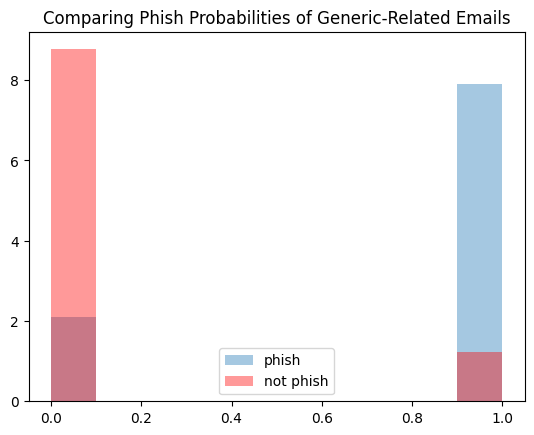

In [8]:
plt.hist(true_phish['generic'], histtype='stepfilled', label = 'phish', density = True, stacked = True, alpha = 0.4)
plt.hist(fish['generic'], label = 'not phish', density = True, stacked = True, alpha=0.4, color = 'red')
plt.legend()
plt.title("Comparing Phish Probabilities of Generic-Related Emails")

Text(0.5, 1.0, 'Comparing Phish Probabilities of Emails Containing Attachments')

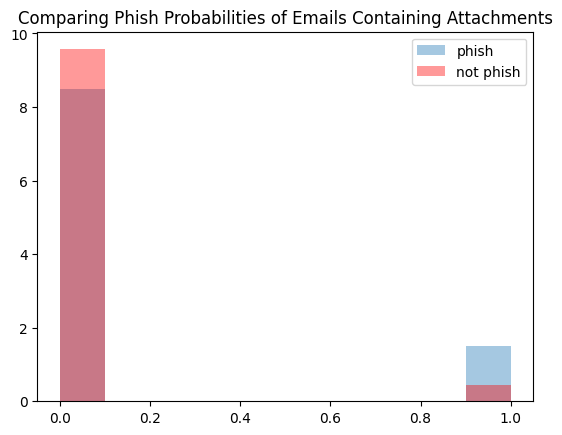

In [9]:
plt.hist(true_phish['attachment'], histtype='stepfilled', label = 'phish', density = True, stacked = True, alpha = 0.4)
plt.hist(fish['attachment'], label = 'not phish', density = True, stacked = True, alpha=0.4, color = 'red')
plt.legend()
plt.title("Comparing Phish Probabilities of Emails Containing Attachments")

Text(0.5, 1.0, 'Comparing Phish Probabilities of Emails Containing Typos')

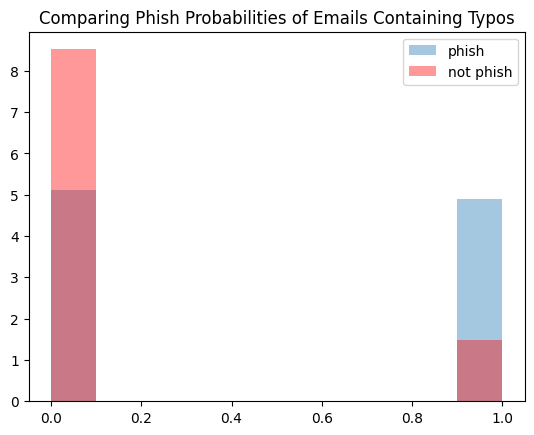

In [10]:
plt.hist(true_phish['typos'], histtype='stepfilled', label = 'phish', density = True, stacked = True, alpha = 0.4)
plt.hist(fish['typos'], label = 'not phish', density = True, stacked = True, alpha=0.4, color = 'red')
plt.legend()
plt.title("Comparing Phish Probabilities of Emails Containing Typos")

Text(0.5, 1.0, 'Comparing Phish Probabilities of Emails Containing Links')

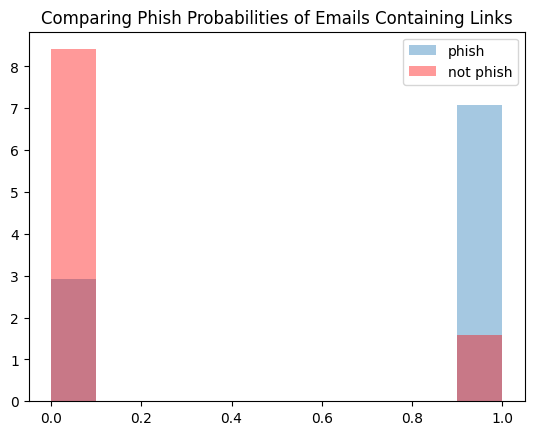

In [11]:
plt.hist(true_phish['click-link'], histtype='stepfilled', label = 'phish', density = True, stacked = True, alpha = 0.4)
plt.hist(fish['click-link'], label = 'not phish', density = True, stacked = True, alpha=0.4, color = 'red')
plt.legend()
plt.title("Comparing Phish Probabilities of Emails Containing Links")

Text(0.5, 1.0, 'Comparing Phish Probabilities of Grammatically Correct Emails')

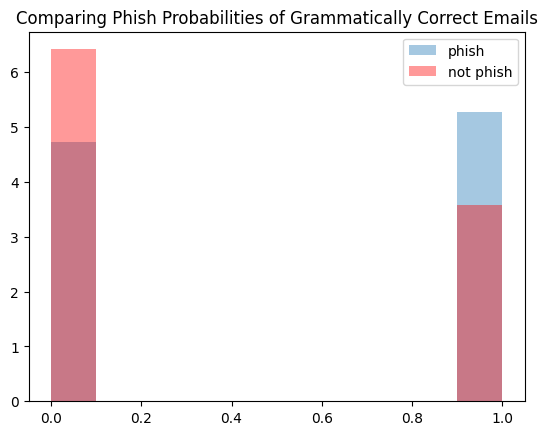

In [12]:
plt.hist(true_phish['grammar'], histtype='stepfilled', label = 'phish', density = True, stacked = True, alpha = 0.4)
plt.hist(fish['grammar'], label = 'not phish', density = True, stacked = True, alpha=0.4, color = 'red')
plt.legend()
plt.title("Comparing Phish Probabilities of Grammatically Correct Emails")

Text(0.5, 1.0, 'Comparing Phish Probabilities of Emails About Logins')

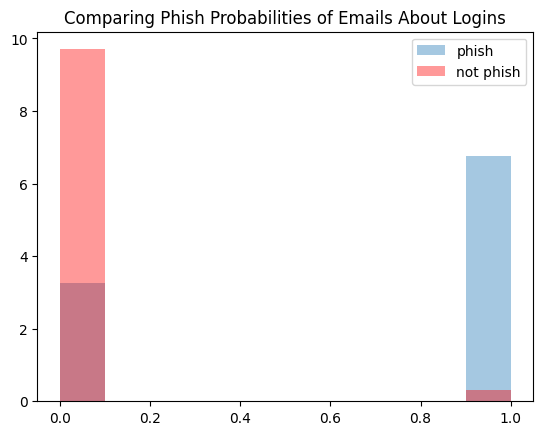

In [13]:
plt.hist(true_phish['login'], histtype='stepfilled', label = 'phish', density = True, stacked = True, alpha = 0.4)
plt.hist(fish['login'], label = 'not phish', density = True, stacked = True, alpha=0.4, color = 'red')
plt.legend()
plt.title("Comparing Phish Probabilities of Emails About Logins")

Text(0.5, 1.0, 'Comparing Phish Probabilities of Urgent Emails')

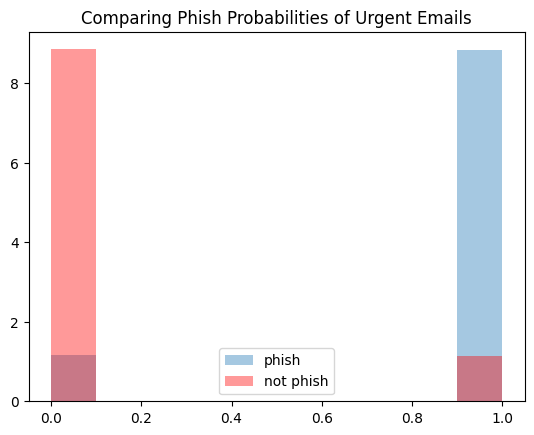

In [14]:
plt.hist(true_phish['urgency'], histtype='stepfilled', label = 'phish', density = True, stacked = True, alpha = 0.4)
plt.hist(fish['urgency'], label = 'not phish', density = True, stacked = True, alpha=0.4, color = 'red')
plt.legend()
plt.title("Comparing Phish Probabilities of Urgent Emails")

Text(0.5, 1.0, 'Comparing Phish Probabilities of Soliciting Emails')

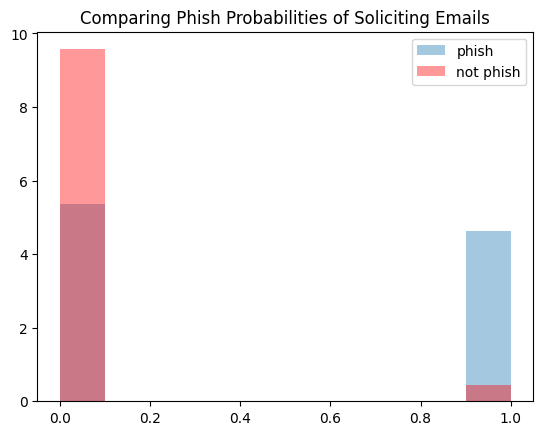

In [15]:
plt.hist(true_phish['unsolicited'], histtype='stepfilled', label = 'phish', density = True, stacked = True, alpha = 0.4)
plt.hist(fish['unsolicited'], label = 'not phish', density = True, stacked = True, alpha=0.4, color = 'red')
plt.legend()
plt.title("Comparing Phish Probabilities of Soliciting Emails")

Text(0.5, 1.0, 'Comparing Phish Probabilities of Work-Related Emails')

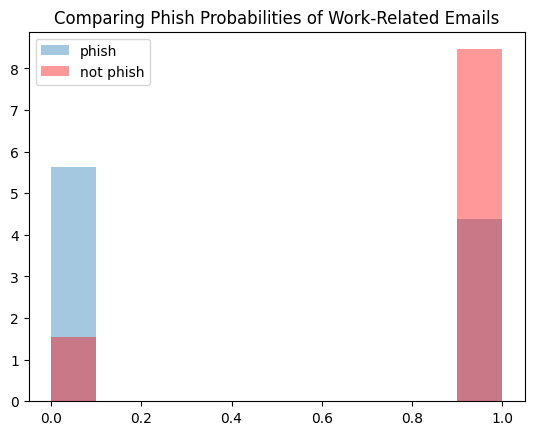

In [16]:
plt.hist(true_phish['work'], histtype='stepfilled', label = 'phish', density = True, stacked = True, alpha = 0.4)
plt.hist(fish['work'], label = 'not phish', density = True, stacked = True, alpha=0.4, color = 'red')
plt.legend()
plt.title("Comparing Phish Probabilities of Work-Related Emails")

In [17]:
# Let's try using Logistic Regression. Let's separate our data first.

In [18]:
X = phish[['billing', 'account', 'generic', 'attachment', 'typos', 'click-link', 'grammar', 'login', 'urgency', 'unsolicited', 'work']]
Y = phish['PHISH-GT']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [19]:
model = lm.LogisticRegression()
model.fit(X_train, Y_train)


LogisticRegression()

In [20]:
training_accuracy = model.score(X_train, Y_train)
training_accuracy

0.937419076391886

In [21]:
# A 93% accuracy is fantastic! Let's see how accurate it is, for our test data.

In [22]:
test_accuracy = model.score(X_test, Y_test)
test_accuracy

0.9413793103448276

In [23]:
#this looks pretty swaggy

In [24]:
# compute correlations between hand and automated labels (phish v phish-GT)
# sklearn has Pearson or Spearmin
# stare at coefficients to see which ones have the highest weight
# do error analysis; try to figure out why its erroring. False positives v false negatives... Precision and recall, F1, decision matrix.